In [1]:
require(repr)
require(ggplot2)

options(repr.plot.width=15, repr.plot.height=8)

Loading required package: repr
Loading required package: ggplot2
Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar


In [2]:
current_folder = getwd()

require(data.table)
require(lubridate)

dat = fread('YAT-01012019-10122021.csv')

setnames(dat,names(dat),c('date','hour','yat_one','yat_two','yat_three'))
dat[,datex:=strptime(date,'%d/%m/%Y')]

dat[,tst:=ymd_hm(paste(datex,hour))]
dat[,date:=date(tst)]
dat[,hour:=hour(tst)]

dat[,yat_one_t:=gsub('\\.','',yat_one)]
dat[,yat_two_t:=gsub('\\.','',yat_two)]
dat[,yat_three_t:=gsub('\\.','',yat_three)]


dat[,yat_one:=as.numeric(gsub(',','.',yat_one_t))]
dat[,yat_two:=as.numeric(gsub(',','.',yat_two_t))]
dat[,yat_three:=as.numeric(gsub(',','.',yat_three_t))]


yat_dat = dat[,list(date,hour,yat_one,yat_two,yat_three)]


dat=fread('YAL-01012019-10122021.csv')

# naming is temporary here, used the same set of codes
setnames(dat,names(dat),c('date','hour','yat_one','yat_two','yat_three'))
dat[,datex:=strptime(date,'%d/%m/%Y')]

dat[,tst:=ymd_hm(paste(datex,hour))]
dat[,date:=date(tst)]
dat[,hour:=hour(tst)]

dat[,yat_one_t:=gsub('\\.','',yat_one)]
dat[,yat_two_t:=gsub('\\.','',yat_two)]
dat[,yat_three_t:=gsub('\\.','',yat_three)]


dat[,yal_one:=as.numeric(gsub(',','.',yat_one_t))]
dat[,yal_two:=as.numeric(gsub(',','.',yat_two_t))]
dat[,yal_three:=as.numeric(gsub(',','.',yat_three_t))]


yal_dat = dat[,list(date,hour,yal_one,yal_two,yal_three)]

final_dat = merge(yat_dat,
                  yal_dat,
                  by=c("date","hour"),
                  all=FALSE)

total_vol = final_dat[, list(yat_vol = yat_one + yat_two + yat_three,
                             yal_vol = yal_one + yal_two + yal_three,
                             diff = (yat_one + yat_two + yat_three) - (yal_one + yal_two + yal_three)), by=c("date", "hour")]

total_vol[, direction:=ifelse(diff>50, "surplus", ifelse(diff<(-50),"deficit", "balanced"))]

Loading required package: data.table
Warning message:
"package 'data.table' was built under R version 3.6.3"Loading required package: lubridate
Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following objects are masked from 'package:base':

    date, intersect, setdiff, union

Warning message in strptime(date, "%d/%m/%Y"):
"strptime() usage detected and wrapped with as.POSIXct(). This is to minimize the chance of assigning POSIXlt columns, which use 40+ bytes to store one date (versus 8 for POSIXct). Use as.POSIXct() (which will call strptime() as needed internally) to avoid this warning."Warning message in strptime(date, "%d/%m/%Y"):
"strptime() usage detected and wrapped with as.POSIXct(). This is to minimize the chance of assigning POSIXlt columns, which use 40+ bytes to store on

In [7]:
lapply(total_vol, function(x) sum(is.na(x)))

$date
[1] 0

$hour
[1] 0

$yat_vol
[1] 0

$yal_vol
[1] 0

$diff
[1] 0

$direction
[1] 0

In [6]:
long = melt(total_vol, id="date", measure=c("yat_vol", "yal_vol", "diff"))

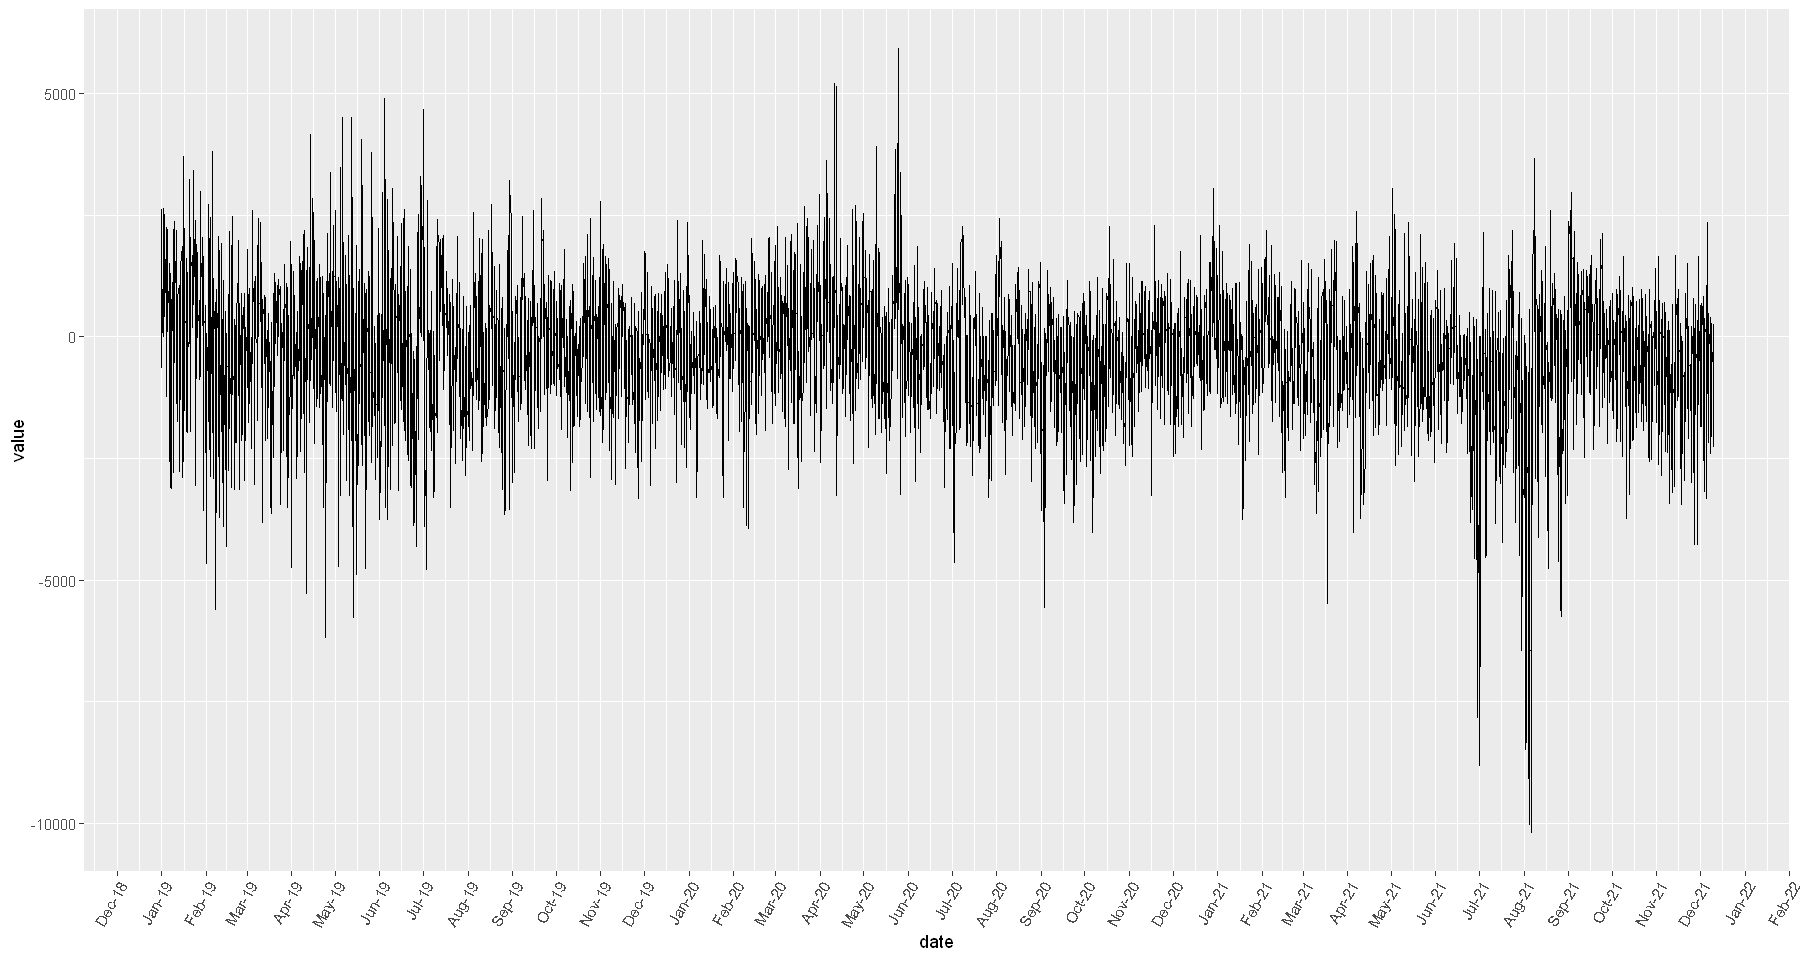

In [98]:
ggplot(long[variable=="diff",], aes(date, value)) + 
    geom_line() + 
    scale_x_date(date_labels="%b-%y", date_breaks="1 month") +
    theme(axis.text.x = element_text(angle = 60, hjust = 1))

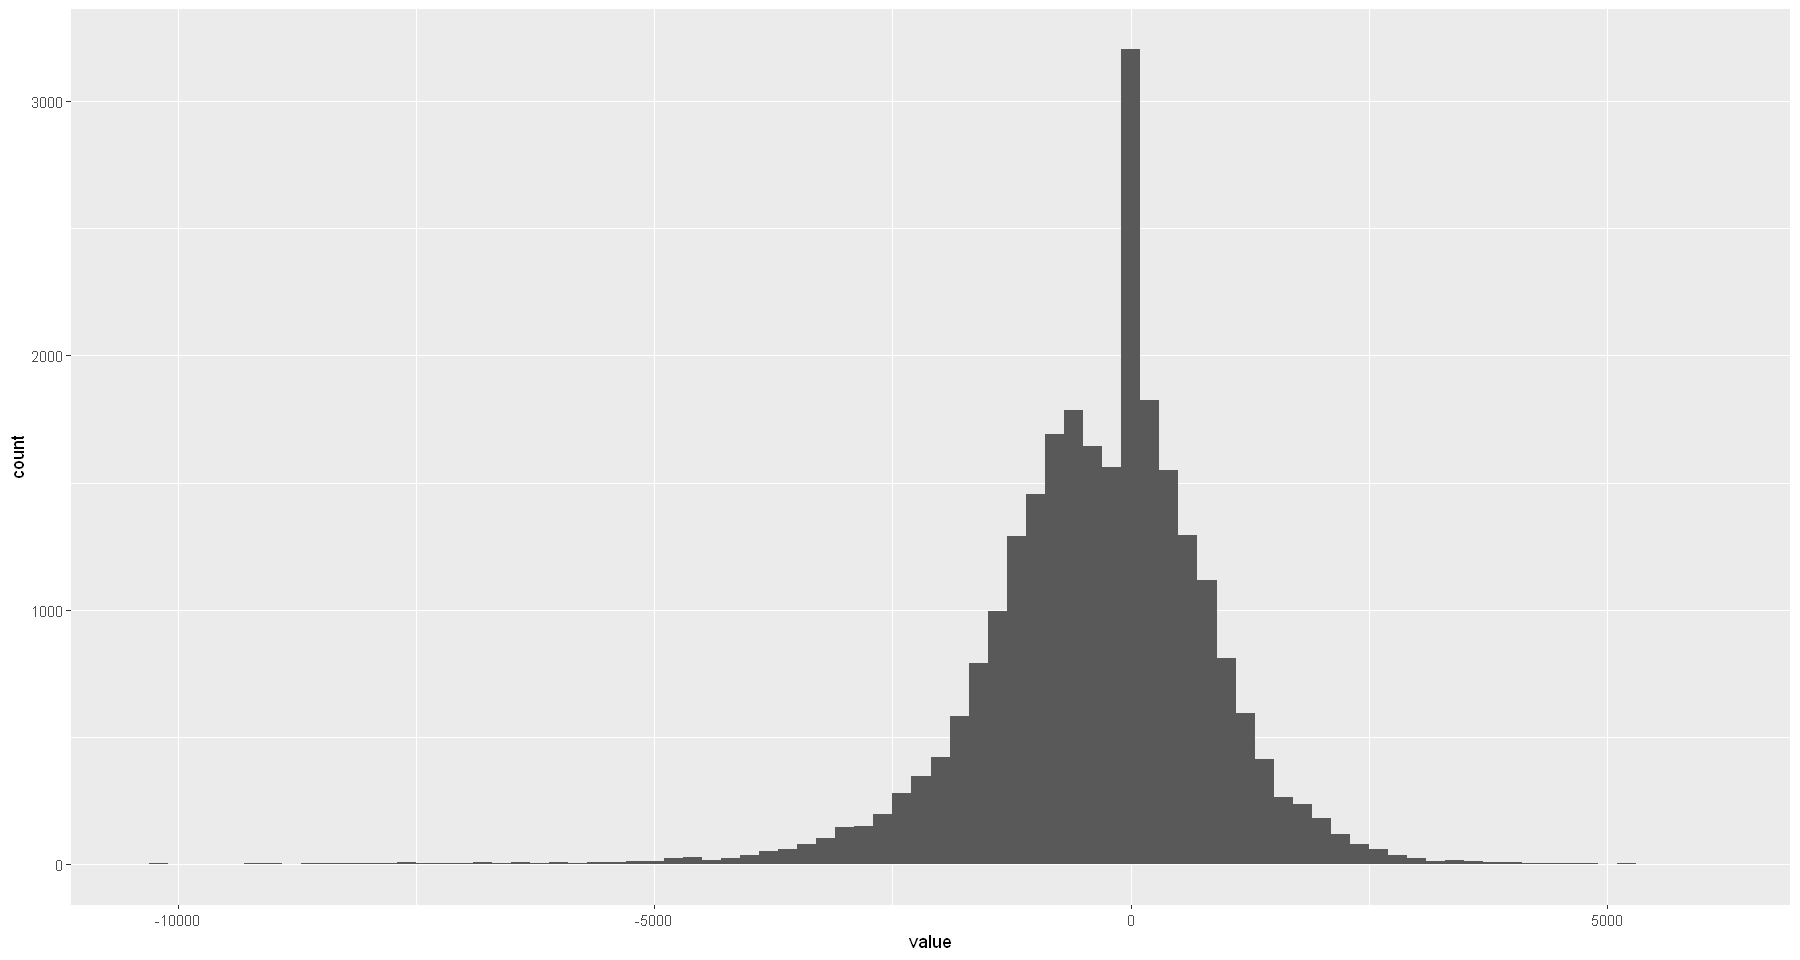

In [80]:
ggplot(long[variable=="diff",], aes(value)) + geom_histogram(binwidth=200)

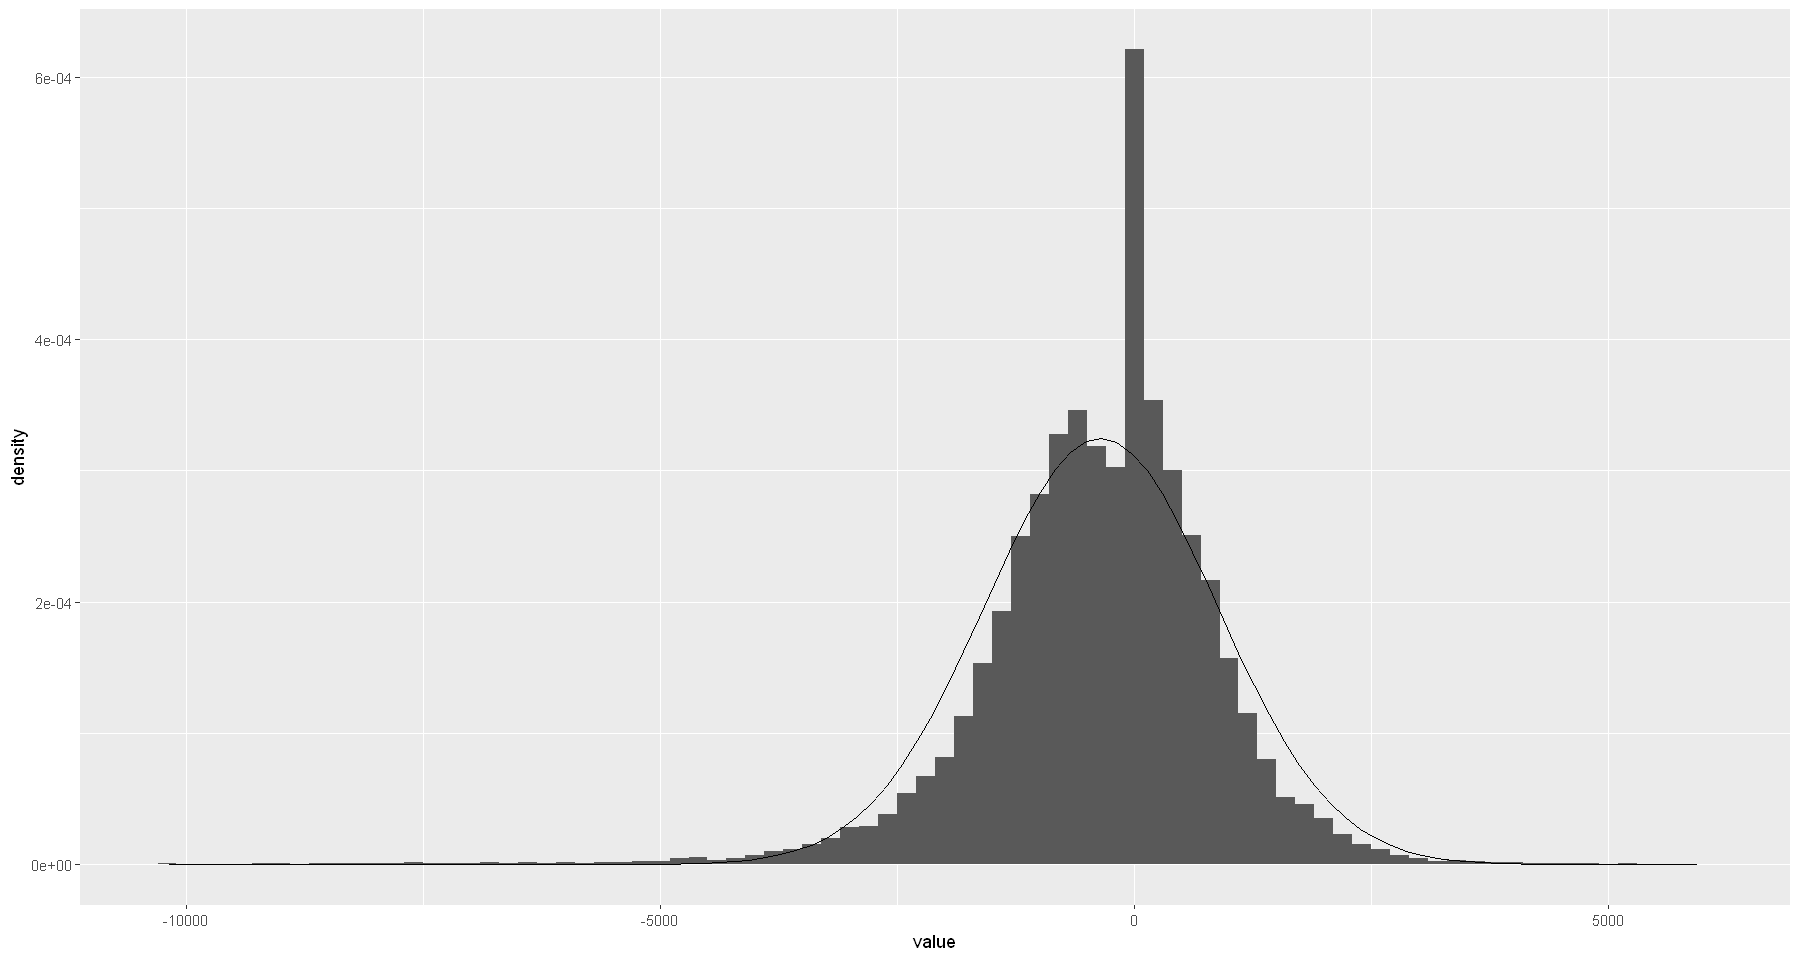

In [81]:
ggplot(long[variable=="diff",], aes(value)) + geom_histogram(binwidth=200,  aes(y=..density..)) + stat_function(fun = dnorm, args = list(mean = mean(total_vol$diff), sd = sd(total_vol$diff)))

In [119]:
total_vol[,month:=month(date)][,year:=year(date)][,weekday:=weekdays(date)]

In [127]:
dcast(total_vol[,.N,by=c("direction","month")], month ~ direction, value.var="N")

month,balanced,deficit,surplus
1,186,1053,993
2,175,1084,781
3,142,1115,975
4,171,1011,978
5,154,1233,845
6,173,1339,648
7,138,1476,618
8,135,1396,701
9,225,1121,814
10,306,1305,621


In [128]:
dcast(total_vol[,.N,by=c("direction","hour")], hour ~ direction, value.var="N")

hour,balanced,deficit,surplus
0,67,546,462
1,82,663,330
2,134,591,350
3,160,529,386
4,180,467,428
5,149,495,431
6,127,455,493
7,73,512,490
8,51,584,440
9,79,667,329


In [134]:
dcast(total_vol[,.N,by=c("direction","weekday")], weekday ~ direction, value.var="N")

weekday,balanced,deficit,surplus
Friday,307,2076,1313
Monday,227,2161,1284
Saturday,330,2012,1330
Sunday,382,1634,1656
Thursday,308,2167,1221
Tuesday,314,2235,1147
Wednesday,317,2083,1296
